In [1]:
pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import mesa
import random
import seaborn as sns
import numpy as np
#

In [3]:
class MyAgent(mesa.Agent):
  def __init__(self,model,name,wealth,greed):
    super().__init__(self,model)
    self.name = name
    self.wealth = wealth
    self.greed = greed
  def step(self):
    print("agent {} has".format(self.name), self.wealth, "wealth")
    # Whatever else the agent does when activated

In [4]:
class MyModel(mesa.Model):
    def __init__(self, n_agents):
      super().__init__()
      self.schedule = mesa.time.RandomActivation(self)
      self.grid = mesa.space.MultiGrid(10, 10, torus=True)
      for i in range(n_agents):
        wealth = random.randint(0,6)
        greed = random.randint(0,1)
        a = MyAgent(self,i,wealth,greed)
        self.schedule.add(a)
        coords = (self.random.randrange(0, 10), self.random.randrange(0, 10))
        self.grid.place_agent(a, coords)
    def step(self):
      self.schedule.step()

In [5]:
a = MyModel(5)
a.step()

agent 2 has 2 wealth
agent 1 has 1 wealth
agent 3 has 0 wealth
agent 0 has 0 wealth
agent 4 has 6 wealth


In [6]:
class MyAgent(mesa.Agent):
  def __init__(self,model,name,wealth,greed):
    super().__init__(self,model)
    self.name = name
    self.wealth = wealth
    self.greed = greed
  def step(self):
    print("agent {} has".format(self.name), self.wealth, "wealth")
    self.move()
    if self.greed == 0:
      if self.wealth > 0:
        self.giveWealth()
  def move(self):
    pass
  def giveWealth(self):
    pass
    # Whatever else the agent does when activated

In [9]:
class MyAgent(mesa.Agent):
  def __init__(self,name,model,wealth,greed):
    super().__init__(name,model)
    self.name = name
    self.wealth = wealth
    self.greed = greed
  def step(self):
    #print("agent {} has".format(self.name), self.wealth, "wealth")
    self.move()
    if self.greed == 0:
      if self.wealth > 0:
        self.giveWealth()
  def move(self):
    possible_steps = self.model.grid.get_neighborhood(self.pos,moore = True,include_center = False)
    new_position = self.random.choice(possible_steps)
    self.model.grid.move_agent(self, new_position)
  def giveWealth(self):
    cellmates = self.model.grid.get_cell_list_contents([self.pos])
    cellmates.pop(cellmates.index(self))
    if len(cellmates) > 1:
      other = self.random.choice(cellmates)
      other.wealth += 1
      self.wealth -= 1

In [10]:
class MyModel(mesa.Model):
    def __init__(self, n_agents):
      super().__init__()
      self.schedule = mesa.time.RandomActivation(self)
      self.grid = mesa.space.MultiGrid(10, 10, torus=True)
      for i in range(n_agents):
        wealth = random.randint(0,6)
        greed = random.randint(0,1)
        a = MyAgent(i,self,wealth,greed)
        self.schedule.add(a)
        coords = (self.random.randrange(0, 10), self.random.randrange(0, 10))
        self.grid.place_agent(a, coords)
      self.datacollector = mesa.DataCollector(
          model_reporters={},
          agent_reporters={"Wealth":"wealth"},
        )
    def step(self):
      self.datacollector.collect(self)
      self.schedule.step()

              Wealth
Step AgentID        
0    0             1
     1             1
     2             6
     3             4
     4             5
...              ...
9    426           6
     422           7
     225           0
     351           7
     415           1

[5000 rows x 1 columns]


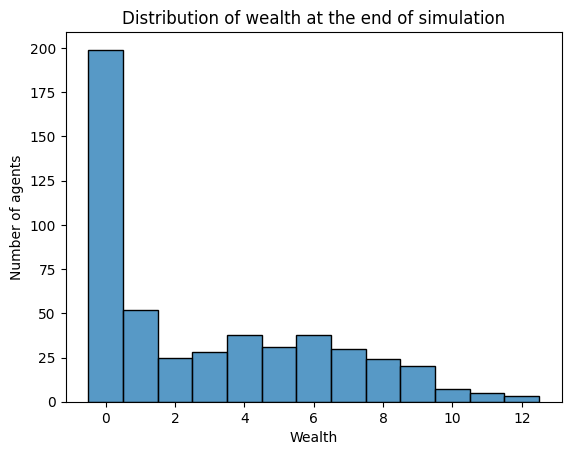

In [11]:
model = MyModel(500)
for i in range(10):
  model.step()
agent_wealth = model.datacollector.get_agent_vars_dataframe()
print(agent_wealth)
last_step = agent_wealth.index.get_level_values("Step").max()
end_wealth = agent_wealth.xs(last_step, level="Step")["Wealth"]
g = sns.histplot(end_wealth, discrete=True)
g.set(
    title="Distribution of wealth at the end of simulation",
    xlabel="Wealth",
    ylabel="Number of agents",
);



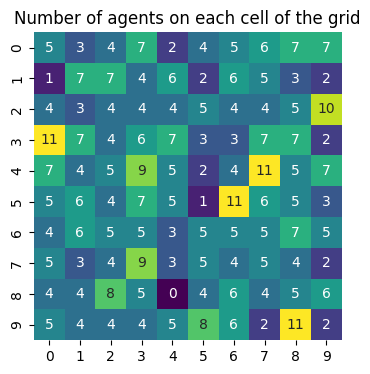

In [12]:
agent_counts = np.zeros((model.grid.width,model.grid.height))
for cell_content, (x,y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Number of agents on each cell of the grid");